In [3]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Knn
 - technique designed to predict outcomes based on similar ("close values")

In [4]:
knn = pd.read_csv("Knn.csv")

In [5]:
knn_sub = knn[['Song Title', 'Artist', 'Genre', 'Danceability', 'Energy', 'Key', 'dB',
       'Speechiness', 'Acousticness', 'Tempo', 'Duration','OUTCOME']]

<Axes: xlabel='Tempo', ylabel='Key'>

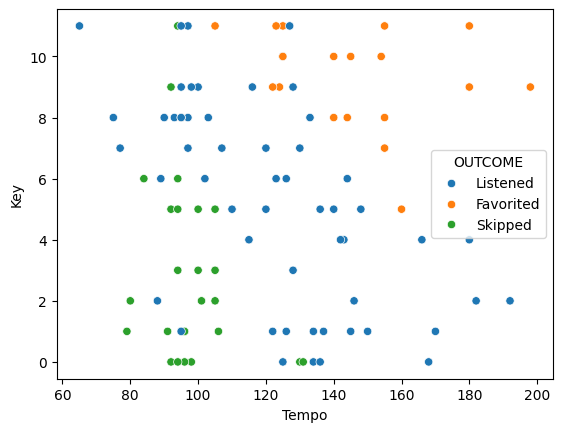

In [6]:
sns.scatterplot(x=knn_sub['Tempo'],y=knn_sub['Key'], hue=knn_sub['OUTCOME'])

In [7]:
knn_sub.head()

,Song Title,Artist,Genre,Danceability,Energy,Key,dB,Speechiness,Acousticness,Tempo,Duration,OUTCOME
0,God's Plan,Drake,Hip-Hop/Rap,75.0,45.0,7.0,-9.2,11.0,3.0,77.0,199.0,Listened
1,SAD!,XXXTENTACION,Hip-Hop/Rap,74.0,61.0,8.0,-4.9,14.0,26.0,75.0,167.0,Listened
2,rockstar (feat. 21 Savage),Post Malone,Hip-Hop/Rap,59.0,52.0,5.0,-6.1,7.0,12.0,160.0,218.0,Favorited
3,Psycho (feat. Ty Dolla $ign),Post Malone,Hip-Hop/Rap,75.0,56.0,8.0,-8.0,11.0,55.0,140.0,221.0,Favorited
4,In My Feelings,Drake,Hip-Hop/Rap,84.0,63.0,1.0,-5.8,13.0,6.0,91.0,218.0,Skipped


## Train - test split 
 - prior to feature engineering to avoid data leakage
 - Prevents overfitting (learning exact values "answers to test" not the pattern/ generalization of the data)

In [8]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# X = df.drop('fraud', axis=1)
X = knn_sub[['Danceability', 'Energy', 'Key', 'dB',
       'Speechiness', 'Acousticness', 'Tempo', 'Duration', 'Artist', 'Genre']]

#need to code target to numberic given its a string, this is not a transformation that will casue leakage
from sklearn.preprocessing import LabelEncoder

y = knn[['OUTCOME']]
# .values.ravel()
# .reshape(-1, 1)
# y = np.ravel(y)

le = LabelEncoder()
y['OUTCOME_enc'] = le.fit_transform(y)

y = y.drop('OUTCOME', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

C:\Users\RPIHLSTR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RPIHLSTR\AppData\Local\Temp\ipykernel_25868\997377169.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['OUTCOME_enc'] = le.fit_transform(y)


## Feature Engineer
 - Examples  - one hot, scaling, log transformation(when data skewed), Discretization (grouping/ binning), Data Extraction (Year, Month, weekday, etc), bolean
 - Almost all feature engineering like standarisation, Normalisation, get dummies etc should be done after train testsplit.
 - If you perform the encoding before the split, it will lead to data leakage (train-test contamination)

In [11]:
#get how data was coded from LabelEncoder
dict(zip(le.classes_,range(len(le.classes_))))

{'Favorited': 0, 'Listened': 1, 'Skipped': 2}

In [12]:
#encode strings / categorical values
X_train_art_dummmies = pd.get_dummies(X_train['Artist'], prefix='art_' ,drop_first=True)
X_train_Genre_dummies = pd.get_dummies(X_train['Genre'], prefix='gen_' ,drop_first=True)

X_test_art_dummmies = pd.get_dummies(X_test['Artist'], prefix='art_' ,drop_first=True)
X_test_Genre_dummies = pd.get_dummies(X_test['Genre'], prefix='gen_' ,drop_first=True)

# pd.get_dummies(X_train, columns = ['Artist','Genre'], drop_first=True)

# data_Target_Homes = data_Target_Homes.drop('If_renovated', axis=1)
X_train = X_train.drop(['Artist','Genre'],axis=1)
X_test = X_test.drop(['Artist','Genre'],axis=1)

In [13]:
X_train_art_dummmies

,art__Anne-Marie,art__Ariana Grande,art__Bebe Rexha,art__Becky G,art__BlocBoy JB,art__Bruno Mars,art__Calvin Harris,art__Camila Cabello,art__Cardi B,art__DJ Khaled,...,art__Sam Smith,art__Selena Gomez,art__Shawn Mendes,art__The Weeknd,art__Wolfine,art__XXXTENTACION,art__ZAYN,art__Zac Efron,art__Zedd,art__benny blanco
28,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
93,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
71,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
92,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Scale aka (standardization, feature scaling, or kinda Normalization) of numerics
 - Most difficult issue working with numerics is differences in magnitudes. This is particularly important for models that rely on distance calculations or gradient-based optimization techniques, as features with large variations in scale can dominate the learning process, leading to biased or inaccurate predictions. If you have numerics on different scales (dollars, years, age, days) that can impact your models as the bigger numbers will impact your model more than smaller numbers because the distance between points can become meaningless, standardization ensure different magnitude numerics impact model similiarly

 - Why Scaling Matters Improves Model Convergence: Algorithms like Gradient Descent converge faster when features are scaled because smaller feature ranges lead to smoother loss functions.
 - Helps with Distance-Based Models: Models like K-nearest neighbors (KNN) and Support Vector Machines (SVM) that rely on distance metrics (e.g., Euclidean distance) perform better when features are on a similar scale.
 - Regularization Effects: Some models apply regularization, which penalizes large coefficients. Scaling ensures that regularization affects all features uniformly.
 - Algorithms that Require Scaling --K-nearest neighbors (KNN)--Support Vector Machines (SVM)--Principal Component Analysis (PCA)--Logistic Regression (with gradient-based optimization)--Neural Networks
   
- Algorithms that Don't Need Scaling (Insensitive to Scaling)
--Decision Trees
--Random Forests
--Gradient Boosting Machines (GBM)

In practice, the choice of scaling method depends on the type of data and the specific machine learning model being used.


<b>Scaling for regression models</b>
Whether regression models require scaled features depends on the type of regression algorithm and the way it operates. Here’s a breakdown of different types of regression models and their relationship with feature scaling:

1. Linear Regression
- Ordinary Least Squares (OLS) regression <u>does not</u> strictly require feature scaling, as the model computes the coefficients based on the relationships between the input features and the target variable.
However, if regularization is applied (like in Ridge or Lasso regression), scaling becomes important. Regularization penalizes large coefficients, so features with larger ranges can dominate the penalty term if not scaled properly.
When to scale: If using any form of regularization (Ridge, Lasso, Elastic Net) or gradient descent for optimization, scaling the features is recommended for optimal performance and faster convergence.

2. Polynomial Regression
Polynomial regression is an extension of linear regression where the model tries to capture nonlinear relationships by introducing polynomial terms.
Since polynomial features can increase the range of values drastically, scaling is recommended to prevent certain features from dominating the model.

3. Logistic Regression
Logistic regression, like linear regression, does not require feature scaling in theory. However, when trained using gradient descent or when regularization (L2 for Ridge or L1 for Lasso) is used, scaling is critical for efficient learning and convergence.
Why scaling is important: Logistic regression's decision boundary is influenced by the size of

### Standard scaler (standartization)
 - Centers the data around the mean with a standard deviation of 1.  subtracting by the mean and dividing by the original standard deviation which returns a dataset with a mean of 0 and a standard deviation of 1
 -  - <i>When to use:</i> Typically applied when features follow a Gaussian (normal) distribution or when there are no clear bounds on the feature ranges.
Advantages: Less sensitive to outliers compared to min-max scaling.
 - -- The <b>standard deviation</b> is the average amount of variability in your dataset. It tells you, on average, how far each value lies from the mean.

In [14]:
#.fit(X_train) calculates and stores the mean and standard deviation of each feature and stores it in the our example (scaler)
scaler = preprocessing.StandardScaler().fit(X_train)

In [60]:
#mean of each column/ feature
scaler.mean_

array([ 71.04477612,  64.7761194 ,   5.40298507,  -5.7641791 ,
        10.97014925,  20.6119403 , 122.55223881, 204.31343284])

In [61]:
#standard deviation for each numeric feature, or # scaler.scale_ = np.sqrt(scaler.var_)
scaler.scale_

array([13.63208773, 14.51177689,  3.85970265,  1.75266973, 10.06541314,
       23.48384978, 29.48679623, 42.5308348 ])

In [62]:
# transform applies the transformation to each value based on results from .fit()
X_scaled = scaler.transform(X_train)
df_X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)

In [63]:
df_X_scaled.head()

,Danceability,Energy,Key,dB,Speechiness,Acousticness,Tempo,Duration
0,1.170417,-1.776221,-1.399845,-1.903280,1.294517,1.123668,0.388233,-2.005920
1,-3.157607,0.359975,-0.881670,-0.876275,0.797767,-0.835125,2.355216,0.721513
2,-0.223354,-0.466939,1.191028,-0.020438,-0.692485,0.527514,0.761282,0.627464
3,-0.223354,0.980161,-1.140758,0.835399,-0.295085,-0.664795,1.609119,0.368828
4,-0.810204,0.084337,-1.140758,-0.077494,-0.493785,-0.792542,0.761282,-0.148444


### Min Max Scaler
- Definition: Transforms features to a fixed range, typically [0, 1], by subtracting the minimum value and dividing by the range.
- When to use: Useful when you know the data is bounded and you want to preserve the relationships between data points.
- Disadvantages: Sensitive to outliers since they will stretch the range.

### Logarithic Scaline
 - Definition: Transforms data to follow a specific probability distribution (e.g., normal or uniform).
Advantages: Effective in situations where you need the feature distribution to follow a known pattern.
Disadvantages: Can distort the relationships between data points.